In [7]:
#Create fake income/age clusters for N people in k clusters
def createClusteredData(N, k):
    random.seed(10)
    pointsPerCluster = float(N)/k
    X = []
    for i in range (k):
        incomeCentroid = random.uniform(20000.0, 200000.0)
        ageCentroid = random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)])
    X = np.array(X)
    return X

[3 3 3 3 3 3 3 3 3 4 2 3 3 3 4 3 3 3 3 3 2 2 4 2 2 2 0 2 2 2 4 0 0 0 2 0 2
 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 3 2 4 3 2 4 4 4 4 4 4 2 3 3 4 3 4 4 4 4]


C:\Users\rezaz\AppData\Local\Temp/ipykernel_20292/2434897605.py:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(data[:, 0], data[:, 1], c=model.labels_.astype(np.float))


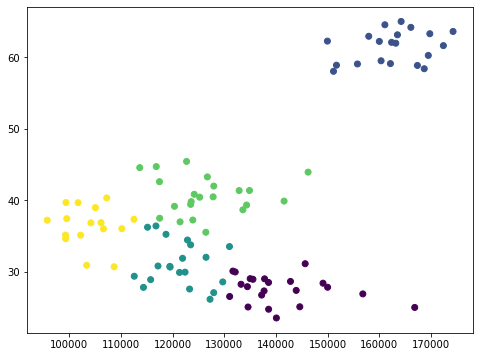

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random
import numpy as np

data = createClusteredData(100, 5)

model = KMeans(n_clusters=5)

# Note I'm scaling the data to normalize it! Important for good results.
model = model.fit(scale(data))

# We can look at the clusters each data point was assigned to
print(model.labels_)

# And we'll visualize it:
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=model.labels_.astype(np.float))
plt.show()